# Digits and NN

In [1]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

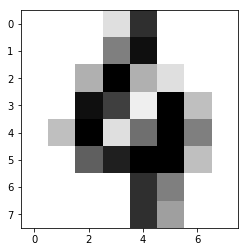

In [2]:
plt.imshow(digits.images[100], cmap=plt.cm.gray_r)


Let's split the data into train and test using sklearn's function.

Before splitting it, we convert it into one-hot encoding: instead of having a vector such as $(1, 2, 10, \ldots)$ we have a matrix with 10 columns with just "one-hot" position with a one.

In [3]:
import keras

X, y_cat = digits.data, digits.target

y = keras.utils.to_categorical(y_cat)

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

Using TensorFlow backend.
/home/jmperez/.pyenv/versions/3.6.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


((1347, 64), (1347, 10), (450, 64), (450, 10))

## Feed-forward network

Let's define our model. 

It will be have 64 input, a hidden layer of 128 neurons, and a softmax layer of 10 units (one per possible digit)

In [4]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(256, input_dim=64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])



In [5]:
model.fit(X_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
1347/1347 [==============================] - 0s 58us/step - loss: 1.2325 - acc: 0.6823
Epoch 2/10
1347/1347 [==============================] - 0s 22us/step - loss: 0.2598 - acc: 0.9191
Epoch 3/10
1347/1347 [==============================] - 0s 22us/step - loss: 0.1637 - acc: 0.9436
Epoch 4/10
1347/1347 [==============================] - 0s 24us/step - loss: 0.1042 - acc: 0.9688
Epoch 5/10
1347/1347 [==============================] - 0s 22us/step - loss: 0.0655 - acc: 0.9814
Epoch 6/10
1347/1347 [==============================] - 0s 22us/step - loss: 0.0618 - acc: 0.9822
Epoch 7/10
1347/1347 [==============================] - 0s 23us/step - loss: 0.0390 - acc: 0.9903
Epoch 8/10
1347/1347 [==============================] - 0s 23us/step - loss: 0.0350 - acc: 0.9918
Epoch 9/10
1347/1347 [==============================] - 0s 25us/step - loss: 0.0233 - acc: 0.9941
Epoch 10/10
1347/1347 [==============================] - 0s 23us/step - loss: 0.0260 - acc: 0.9911


In [6]:
model.evaluate(X_test, y_test)

450/450 [==============================] - 0s 37us/step


[0.11981976743464151, 0.9622222222222222]

## Visualizing the model

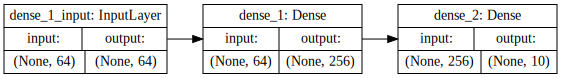

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, rankdir='LR').create(prog='dot', format='svg'))

## Find misclassified instances

In [8]:
import numpy as np

y_classes = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

# Returns a tuple, god know why
misclassified = np.where(y_classes != y_pred)[0]

print(misclassified)


[ 52  70  98 112 130 163 189 199 216 256 309 345 399 409 420 427 428]


Let's take a look at the misclassified instances. What do they look like?

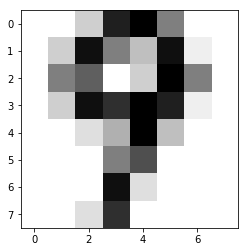

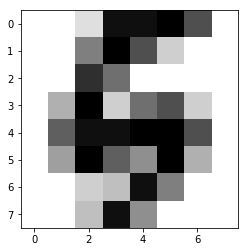

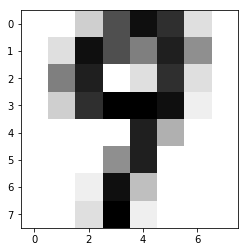

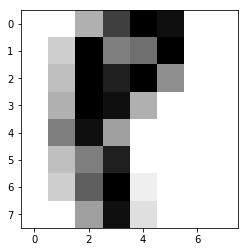

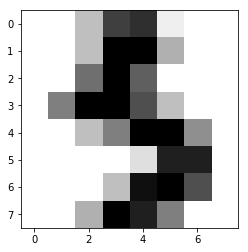

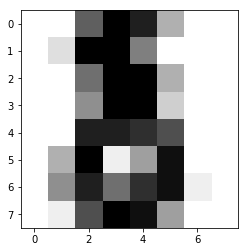

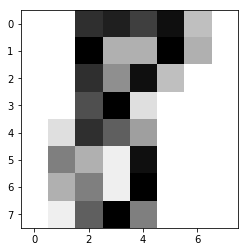

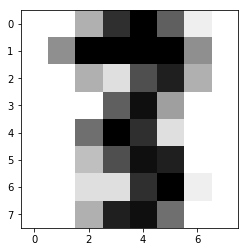

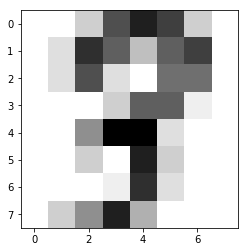

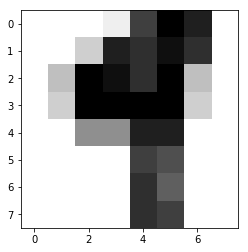

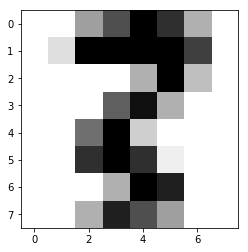

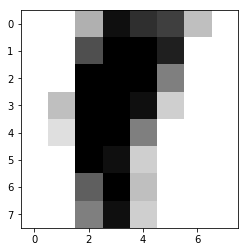

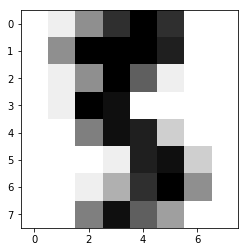

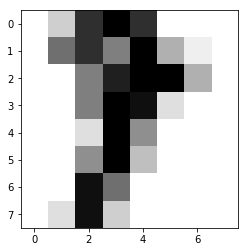

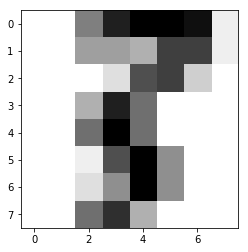

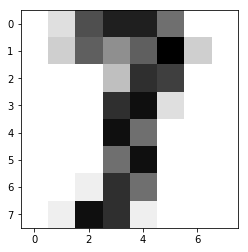

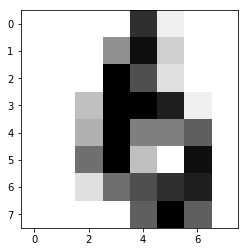

In [9]:
for index in misclassified:
    plt.imshow(X_test[index].reshape(8, -1), cmap=plt.cm.gray_r)
    plt.show()

## Normalizing

In [10]:
X, y_cat = digits.data, digits.target

y = keras.utils.to_categorical(y_cat)

X[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

Let's try moving these values to $[0, 1]$

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train /= np.max(X_train)
X_test /= np.max(X_test)

X_train[0]

array([ 0.    ,  0.    ,  0.    ,  0.6875,  0.625 ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.5   ,  1.    ,  0.3125,  0.    ,
        0.    ,  0.    ,  0.    ,  0.1875,  1.    ,  0.625 ,  0.25  ,
        0.6875,  0.    ,  0.    ,  0.    ,  0.6875,  0.8125,  0.    ,
        0.5625,  1.    ,  0.    ,  0.    ,  0.    ,  0.75  ,  0.8125,
        0.3125,  0.875 ,  1.    ,  0.5   ,  0.    ,  0.    ,  0.1875,
        0.75  ,  0.875 ,  1.    ,  0.6875,  0.1875,  0.    ,  0.    ,
        0.    ,  0.    ,  0.625 ,  0.6875,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.6875,  0.5   ,  0.    ,  0.    ,  0.    ])

In [12]:

model = Sequential()
model.add(Dense(256, input_dim=64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])



In [13]:
model.fit(X_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
1347/1347 [==============================] - 0s 62us/step - loss: 1.7730 - acc: 0.6310
Epoch 2/10
1347/1347 [==============================] - 0s 22us/step - loss: 1.0512 - acc: 0.8731
Epoch 3/10
1347/1347 [==============================] - 0s 22us/step - loss: 0.6539 - acc: 0.9065
Epoch 4/10
1347/1347 [==============================] - 0s 22us/step - loss: 0.4498 - acc: 0.9220
Epoch 5/10
1347/1347 [==============================] - 0s 22us/step - loss: 0.3352 - acc: 0.9310
Epoch 6/10
1347/1347 [==============================] - 0s 22us/step - loss: 0.2683 - acc: 0.9436
Epoch 7/10
1347/1347 [==============================] - 0s 22us/step - loss: 0.2256 - acc: 0.9517
Epoch 8/10
1347/1347 [==============================] - 0s 23us/step - loss: 0.1955 - acc: 0.9607
Epoch 9/10
1347/1347 [==============================] - 0s 25us/step - loss: 0.1706 - acc: 0.9659
Epoch 10/10
1347/1347 [==============================] - 0s 23us/step - loss: 0.1518 - acc: 0.9666


In [14]:
model.evaluate(X_test, y_test)

450/450 [==============================] - 0s 46us/step


[0.13569692820310592, 0.97999999999999998]

At least here, it doesn't seem to outperform significantly the non-normalized version